<a href="https://colab.research.google.com/github/haroldgo23/ph-fake-news-detection/blob/main/Machine_Learning_Tool_for_Identification_of_Philippine_Fake_News_in_Social_Media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake news Detection

### Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import re
import string

###Import csv files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Inserting fake and real dataset

In [ ]:
df_eng = pd.read_csv("/content/drive/MyDrive/Machine Learning Tool for Identification of Philippine Fake News in Social Media/English.csv")
df_fil = pd.read_csv("/content/drive/MyDrive/Machine Learning Tool for Identification of Philippine Fake News in Social Media/Filipino.csv")

In [ ]:
df_eng.head(5)

,Page,Text,Label
0,Manila Bulletin,President Ferdinand “Bongbong” Marcos Jr. beli...,0
1,Manila Bulletin,A New People’s Army member who has pending war...,0
2,Manila Bulletin,Malacañang announced that President Marcos has...,0
3,Manila Bulletin,Fisherfolk organizations staged a peaceful ral...,0
4,Manila Bulletin,Members of the Northern Police District-Distri...,0


In [ ]:
df_fil.head(5)

,Page,Text,Label
0,Balita,Nagtalaga na ng bagong acting president at chi...,0
1,Balita,"Sa paglaganap ng text scam, nagbabala si Senad...",0
2,Balita,Umapela sa gobyerno ang grupong Confederation ...,0
3,Balita,Nagtatago pa rin umano si National Bilibid Pri...,0
4,Balita,Mahigpit ang kautusan ni Manila Mayor Honey La...,0


Inserting a column called "class" for fake and real news dataset to categories fake and true news. 

In [ ]:
#df_fake["class"] = 1
#df_true["class"] = 0

Removing last 10 rows from both the dataset, for manual testing  

In [ ]:
df_eng.shape, df_fil.shape

((1210, 3), (793, 3))

In [ ]:
#df_fake_manual_testing = df_fake.tail(10)
#for i in range(23480,23470,-1):
#    df_fake.drop([i], axis = 0, inplace = True)
#df_true_manual_testing = df_true.tail(10)
#for i in range(21416,21406,-1):
#    df_true.drop([i], axis = 0, inplace = True)

In [ ]:
#df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

Merging the manual testing dataframe in single dataset and save it in a csv file

In [ ]:
#df_fake_manual_testing["class"] = 0
#df_true_manual_testing["class"] = 1

In [ ]:
#df_fake_manual_testing.head(10)

In [ ]:
#df_true_manual_testing.head(10)

In [ ]:
#df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
#df_manual_testing.to_csv("/content/drive/MyDrive/Fake news detection using python | Data Science Problem with python | Machine Learning | Tutorial 1/manual_testing.csv")

Merging the main fake and true dataframe

In [ ]:
df_merge = pd.concat([df_eng, df_fil], axis =0 )
df_merge.head(10)

,Page,Text,Label
0,Manila Bulletin,President Ferdinand “Bongbong” Marcos Jr. beli...,0
1,Manila Bulletin,A New People’s Army member who has pending war...,0
2,Manila Bulletin,Malacañang announced that President Marcos has...,0
3,Manila Bulletin,Fisherfolk organizations staged a peaceful ral...,0
4,Manila Bulletin,Members of the Northern Police District-Distri...,0
5,Manila Bulletin,Secretary of Foreign Affairs Enrique Manalo sa...,0
6,Manila Bulletin,"CAMP RAFAEL C. RODRIGUEZ, Butuan City – A top ...",0
7,Manila Bulletin,The National Bureau of Investigation (NBI) is ...,0
8,Manila Bulletin,At least six members of the New People’s Army ...,0
9,Manila Bulletin,The Department of Finance (DOF) has vowed to r...,0


In [ ]:
df_merge.columns

Index(['Page', 'Text', 'Label'], dtype='object')

#### Dropping unnecessary columns columns 

In [ ]:
df = df_merge.drop(["Page"], axis = 1)
df.head(10)

,Text,Label
0,President Ferdinand “Bongbong” Marcos Jr. beli...,0
1,A New People’s Army member who has pending war...,0
2,Malacañang announced that President Marcos has...,0
3,Fisherfolk organizations staged a peaceful ral...,0
4,Members of the Northern Police District-Distri...,0
5,Secretary of Foreign Affairs Enrique Manalo sa...,0
6,"CAMP RAFAEL C. RODRIGUEZ, Butuan City – A top ...",0
7,The National Bureau of Investigation (NBI) is ...,0
8,At least six members of the New People’s Army ...,0
9,The Department of Finance (DOF) has vowed to r...,0


In [ ]:
df.isnull().sum()

Text     0
Label    0
dtype: int64

#### Randomly shuffling the dataframe 

In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.head()

,Text,Label
769,Compared to the massive BBM-Sara campaign rall...,1
624,"MADNESS AND STATECRAFT ""We all know that PBBM ...",1
318,Two senators – Imee Marcos and Ronald ‘’Bato’’...,0
351,Inatasan ni Pangulong Rodrigo Duterte ang iba’...,0
759,"The 2022 presidential election, if retired bro...",1


In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['Text', 'Label'], dtype='object')

In [ ]:
df.head()

,Text,Label
0,Compared to the massive BBM-Sara campaign rall...,1
1,"MADNESS AND STATECRAFT ""We all know that PBBM ...",1
2,Two senators – Imee Marcos and Ronald ‘’Bato’’...,0
3,Inatasan ni Pangulong Rodrigo Duterte ang iba’...,0
4,"The 2022 presidential election, if retired bro...",1


#### Defining independent and dependent variables as x and y

In [ ]:
x = df["Text"]
y = df["Label"]
#print(x)

#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
df["Text"] = df["Text"].apply(wordopt)

#### Splitting the dataset into training set and testing set. 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Convert text to vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorization = TfidfVectorizer()
X = vectorization.fit_transform(x)
xv_train = vectorization.transform(x_train)
xv_test = vectorization.transform(x_test)
#print(X)



```
# This is formatted as code
```

### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression(C= 1000, max_iter=10000, 
                        penalty='l1', solver='saga')
LR.fit(xv_train,y_train)

LogisticRegression(C=1000, max_iter=10000, penalty='l1', solver='saga')

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.9825436408977556

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
score_lr = cross_val_score(LR, X, y,cv=10)
print(score_lr)
print(score_lr.mean())

[0.95024876 0.9800995  0.96517413 0.985      0.985      0.98
 0.97       0.965      0.99       0.965     ]
0.9735522388059701


### 2. Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier(criterion= 'entropy',
                            max_depth= None,max_features= None,
                            min_samples_leaf= 1, min_samples_split= 6)
DT.fit(xv_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=6)

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.9276807980049875

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
score_dt = cross_val_score(DT, X, y,cv=10)
print(score_dt)
print(score_dt.mean())

[0.88059701 0.92039801 0.91542289 0.9        0.895      0.895
 0.915      0.935      0.93       0.885     ]
0.9071417910447762


### 3. Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(subsample=0.5, n_estimators=1000, 
                                 max_depth=3, learning_rate=0.02) 
# was random state = 0

In [ ]:
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, n_estimators=1000, subsample=0.5)

In [ ]:
pred_gbc = GBC.predict(xv_test)

In [ ]:
GBC.score(xv_test, y_test)

0.9875311720698254

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
score_gbc = cross_val_score(GBC, X, y,cv=10)
print(score_gbc)
print(score_gbc.mean())

[0.960199   0.98507463 0.97512438 0.98       0.955      0.985
 0.98       0.98       0.985      0.96      ]
0.9745398009950247


### 4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=50, min_samples_split=6,
                             min_samples_leaf=2,max_features='sqrt',
                             max_depth=None, criterion='entropy')

In [ ]:
RFC.fit(xv_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=6,
                       n_estimators=50)

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test, y_test)

0.972568578553616

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
score_rfc = cross_val_score(RFC, X, y,cv=10)
print(score_rfc)
print(score_rfc.mean())

[0.94527363 0.9800995  0.96517413 0.96       0.965      0.98
 0.965      0.975      0.985      0.94      ]
0.9660547263681591


### 5. Passive-Aggresive Classifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50) # prev best @ max iter = 50

In [ ]:
pac.fit(xv_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [ ]:
pred_pac = pac.predict(xv_test)

In [ ]:
pac.score(xv_test, y_test)

0.9825436408977556

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
score_pac = cross_val_score(pac, X, y,cv=10)
print(score_pac)
print(score_pac.mean())

[0.94029851 0.98507463 0.97014925 0.99       0.99       0.975
 0.975      0.965      0.99       0.96      ]
0.9740522388059702


### 6. Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb= MultinomialNB(alpha=1.0e-10) #no smoothing

In [ ]:
mnb.fit(xv_train, y_train)

MultinomialNB(alpha=1e-10)

In [ ]:
pred_mnb = mnb.predict(xv_test)

In [ ]:
mnb.score(xv_test, y_test)

0.9625935162094763

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
score_nb = cross_val_score(mnb, X, y,cv=10)
print(score_nb)
print(score_nb.mean())

[0.95522388 0.93034826 0.95024876 0.955      0.955      0.95
 0.935      0.945      0.97       0.955     ]
0.9500820895522388


### Support Vector Machine

In [ ]:
from sklearn import svm
svm = svm.SVC(kernel='linear', probability=True)

In [ ]:
svm.fit(xv_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
pred_svm = svm.predict(xv_test)

In [ ]:
svm.score(xv_test, y_test)

0.9750623441396509

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
score_svm = cross_val_score(svm, X, y,cv=10)
print(score_svm)
print(score_svm.mean())

[0.94527363 0.9800995  0.97512438 0.98       0.975      0.985
 0.97       0.97       0.995      0.955     ]
0.9730497512437811


              precision    recall  f1-score   support

           0       0.94      0.97      0.96       196
           1       0.97      0.94      0.96       205

    accuracy                           0.96       401
   macro avg       0.96      0.96      0.96       401
weighted avg       0.96      0.96      0.96       401

[[191   5]
 [ 13 192]]


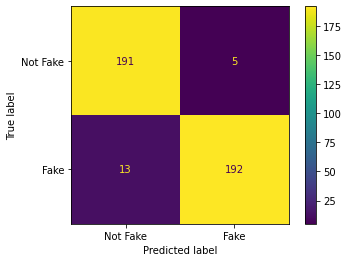

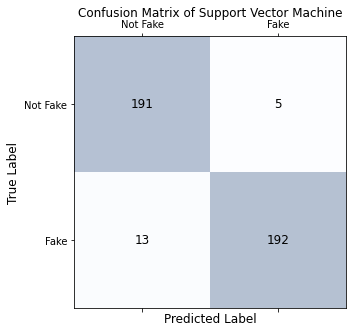

In [ ]:
# if ever conf matrix is needed in the future for performance metrics
""" 
print(classification_report(y_test, pred_svm))
cm_svm = confusion_matrix(y_test, pred_svm)
print(cm_svm)

cmd_svm = ConfusionMatrixDisplay(cm_svm, display_labels=['Not Fake','Fake']) # 0 - not fake, 1 - fake
cmd_svm.plot()  

labels = ['Not Fake','Fake']
fig_svm, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_svm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_svm.shape[0]):
    for j in range(cm_svm.shape[1]):
        ax.text(x=j, y=i,s=cm_svm[i, j], va='center', ha='center', size='large')
 
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix of Support Vector Machine', fontsize=12)
plt.show()

fig_svm.savefig('conf_svm.pdf', format='pdf', bbox_inches = 'tight')
""" 

# ROC / AUC 

In [ ]:
lr_probs = LR.predict_proba(xv_test)
dt_probs = DT.predict_proba(xv_test)
gb_probs = GBC.predict_proba(xv_test)
rf_probs = RFC.predict_proba(xv_test)
#pac_probs = pac.predict_proba(xv_test)
nb_probs = mnb.predict_proba(xv_test)
svm_probs = svm.predict_proba(xv_test)

In [ ]:
# getting probabilities for the positive outcome
lr_probs = lr_probs[:, 1]
dt_probs = dt_probs[:, 1]
gb_probs = gb_probs[:, 1]
rf_probs = rf_probs[:, 1]
#pac_probs = pac_probs[:, 1]
nb_probs = nb_probs[:, 1]
svm_probs = svm_probs[:, 1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
lr_auc = roc_auc_score(y_test, lr_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
#pac_auc = roc_auc_score(y_test, pac_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

In [ ]:
print('LR: AUC = %.3f' % (lr_auc))
print('DTC: AUC = %.3f' % (dt_auc))
print('GBC: AUC = %.3f' % (gb_auc))
print('RF: AUC = %.3f' % (rf_auc))
#print('LR: AUC = %.3f' % (pac_auc))
print('NB: AUC = %.3f' % (nb_auc))
print('SVM: AUC = %.3f' % (svm_auc))

LR: AUC = 0.999
DTC: AUC = 0.934
GBC: AUC = 0.999
RF: AUC = 0.997
NB: AUC = 0.991
SVM: AUC = 0.999


In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
#pac_fpr, pac_tpr, _ = roc_curve(y_test, pac_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

### Plot the curves

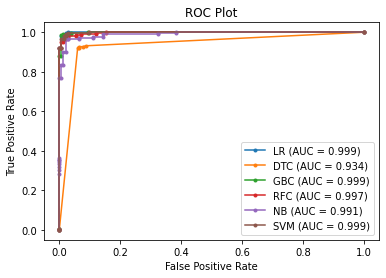

In [ ]:
roc_plot = plt.figure()
plt.plot(lr_fpr, lr_tpr, marker='.', label='LR (AUC = %0.3f)' % lr_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='DTC (AUC = %0.3f)' % dt_auc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='GBC (AUC = %0.3f)' % gb_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='RFC (AUC = %0.3f)' % rf_auc)
#plt.plot(pac_fpr, pac_tpr, marker='.', label='PAC (AUC = %0.3f)' % pac_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='NB (AUC = %0.3f)' % nb_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUC = %0.3f)' % svm_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend()  
# Show plot
plt.show()

roc_plot.savefig('roc.pdf', format='pdf', bbox_inches = 'tight')

# Model Testing With Manual Entry

### News

In [ ]:
def output_lable(n):
    if n == 0:
        return "not Fake news"
    elif n == 1:
        return "Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    pred_pac = pac.predict(new_xv_test)
    pred_mnb = mnb.predict(new_xv_test)
    pred_svm = svm.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {} \nPAC Prediction: {} \nMNB Prediction: {} \nSVM Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                                                                                            output_lable(pred_DT[0]), 
                                                                                                                                                                            output_lable(pred_GBC[0]), 
                                                                                                                                                                            output_lable(pred_RFC[0]),
                                                                                                                                                                            output_lable(pred_pac[0]),
                                                                                                                                                                            output_lable(pred_mnb[0]),
                                                                                                                                                                            output_lable(pred_svm[0])))

In [ ]:
news = str(input())
manual_testing(news)

President ferdinand "bongbong" marcos jr.  in monday the signed sim card registration the action, first legislation enacted under he is administration.  The law aims to curb text scams and spam.       powered by adsparc the ceremonial signing were hold on malacañang taking senate president juan miguel zubiri, place speaker martin romualdez and other stakeholders standing to witnesses.    "i the commend legislators the originate place and the originate senate of coming upon taking that timely and necessary law.  It the is first legislative measured this successfully the pass approval the for bicameral panel for both houses the on 19th the congress," chief executive say, adding this such that law "has long achieved overdue. "  the "truly, legislation is moving to be welcome by prolific for our people, especially currently taking reports the for commission for various crimes using mobile phones, including proliferation for text scams and spam.  Indeed, the taking signing for that law, our